<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Wahyudi**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

Rusty Bargain adalah perusahaan jual beli mobil bekas yang sedang mengembangkan sebuah aplikasi untuk menarik pembeli baru. Dalam aplikasi tersebut, kamu bisa dengan cepat mengetahui nilai pasar mobilmu. Kamu memiliki akses ke data historis, spesifikasi teknis kendaraan, versi model kendaraan, dan harga kendaraan. Tugasmu adalah membuat suatu model yang mampu menentukan nilai pasar mobil.
Rusty Bargain tertarik pada:

- kualitas prediksi;
- kecepatan model dalam memprediksi;
- waktu yang diperlukan untuk melatih model

## Persiapan Data

### Menyiapkan Libraries

In [1]:
# For numerical operations
import numpy as np

# For dataframe manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Scikit-Learn
## Tools
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

## Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Gradient-boosting models
## XGBoost
from xgboost import XGBRegressor
## LightGBM
from lightgbm import LGBMRegressor
## CatBoost
from catboost import CatBoostRegressor

import time

# Setting the global random_state value for this project
random_state = 12345

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Menyiapkan dataset

In [2]:
try:
    df = pd.read_csv('car_data.csv')
except:
    df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
334549,05/03/2016 14:41,3299,convertible,2002,manual,147,astra,150000,1,petrol,opel,no,05/03/2016 00:00,0,54413,07/04/2016 09:45
348257,03/04/2016 20:59,399,sedan,1993,manual,75,golf,150000,11,petrol,volkswagen,no,03/04/2016 00:00,0,96190,05/04/2016 21:47
98930,11/03/2016 10:43,1350,coupe,1994,manual,75,3er,150000,5,petrol,bmw,no,11/03/2016 00:00,0,22335,11/03/2016 23:17
37887,20/03/2016 11:39,6450,wagon,2009,manual,101,focus,70000,7,petrol,ford,no,20/03/2016 00:00,0,85435,22/03/2016 17:46
262764,03/04/2016 15:52,6700,small,2010,manual,82,fiesta,60000,9,petrol,ford,no,03/04/2016 00:00,0,66299,05/04/2016 15:16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Terdapat data yang hilang pada beberapa kolom

Dataset memiliki beberapa kolom-kolom diantaranya:

Fitur:

- `DateCrawled` — tanggal ketika profil diunduh dari database
- `VehicleType` — jenis bodi kendaraan
- `RegistrationYear` — tahun registrasi kendaraan
- `Gearbox` — jenis transmisi
- `Power` — daya (hp)
- `Model` — model kendaraan
- `Mileage` — jarak tempuh (diukur dalam satuan km berdasarkan dataset regional tertentu)
- `RegistrationMonth` — bulan registrasi kendaraan
- `FuelType` — jenis bahan bakar
- `Brand` — merek kendaraan
- `NotRepaired` — apakah kendaraan pernah direparasi sebelumnya
- `DateCreated` — tanggal pembuatan profil
- `NumberOfPictures` — jumlah gambar kendaraan
- `PostalCode` — kode pos pemilik profil (pengguna)
- `LastSeen` — tanggal aktivitas terakhir pengguna
Target:

- `Price` — harga (dalam satuan Euro)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [5]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


- Kolom Price terdapat nilai yang bernilai nol.
- Kolom RegistrationYear memiliki tahun terendah 1000 dan tertinggi 9999.
- Kolom Power memiliki daya terendah 0 dan tertinggi 20000.
- Kolom RegistrationMonth memiliki bulan registrasi terendah 0.
- Kolom NumberOfPictures semua data bernilai nol.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Memperbaiki Data

In [6]:
# change data type to datetime
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')

In [7]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Semua nilai yang hilang ditemukan dalam fitur kategorikal. Kita bisa menebak Tipe Kendaraan berdasarkan Modelnya. Namun fitur lainnya tidak dapat dengan mudah disimpulkan karena model yang sama dapat memiliki spesifikasi yang berbeda.

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [8]:
# Creating a dictionary to map VehicleType-Model values
## Getting only unique values
df_unique = df[(df['VehicleType'].isna() == False) & (df['Model'].isna() == False)][['VehicleType', 'Model']].copy()
df_unique.drop_duplicates(subset='Model', keep='first', inplace=True)
df_unique = df_unique[['Model', 'VehicleType']]

## Converting value pairs into a dict
model_type_dict = dict(df_unique.values)
model_type_dict

{'grand': 'suv',
 'golf': 'small',
 'fabia': 'small',
 '3er': 'sedan',
 '2_reihe': 'convertible',
 'other': 'sedan',
 'c_max': 'bus',
 '3_reihe': 'sedan',
 'passat': 'wagon',
 'navara': 'suv',
 'ka': 'small',
 'twingo': 'small',
 'a_klasse': 'bus',
 'scirocco': 'coupe',
 '5er': 'sedan',
 'arosa': 'small',
 'civic': 'sedan',
 'transporter': 'bus',
 'punto': 'small',
 'e_klasse': 'sedan',
 'kadett': 'other',
 'one': 'sedan',
 'fortwo': 'small',
 'clio': 'small',
 '1er': 'sedan',
 'b_klasse': 'bus',
 'signum': 'wagon',
 'astra': 'wagon',
 'a8': 'sedan',
 'jetta': 'sedan',
 'polo': 'small',
 'fiesta': 'small',
 'c_klasse': 'wagon',
 'micra': 'small',
 'vito': 'other',
 'sprinter': 'bus',
 '156': 'wagon',
 'escort': 'sedan',
 'forester': 'wagon',
 'xc_reihe': 'suv',
 'scenic': 'bus',
 'a4': 'sedan',
 'a1': 'small',
 'combo': 'bus',
 'focus': 'wagon',
 'tt': 'coupe',
 'corsa': 'small',
 'a6': 'wagon',
 'jazz': 'small',
 'omega': 'sedan',
 'slk': 'sedan',
 '7er': 'sedan',
 '80': 'convertible'

In [9]:
# Filling missing VehicleTypes using the dict
df['VehicleType'] = df['VehicleType'].fillna(df['Model'].map(model_type_dict))
df['VehicleType'].isna().sum()

6828

In [10]:
# Filling the rest of NaN values with 'unknown'
df.fillna('unknown', inplace=True)
df.isna().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

Registration Date

In [11]:
df.sort_values(by='DateCrawled')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
184888,2016-03-05 14:06:00,3500,sedan,2003,auto,203,other,125000,12,petrol,chrysler,no,2016-03-05,0,65719,2016-03-05 21:24:00
169065,2016-03-05 14:06:00,599,small,1997,manual,50,polo,100000,4,petrol,volkswagen,no,2016-03-05,0,60489,2016-03-05 14:25:00
176823,2016-03-05 14:06:00,6200,convertible,2006,manual,135,megane,90000,9,petrol,renault,no,2016-03-05,0,35764,2016-03-24 09:16:00
116018,2016-03-05 14:06:00,3950,bus,1995,auto,110,transporter,150000,6,petrol,volkswagen,no,2016-03-05,0,65719,2016-03-13 10:11:00
220604,2016-03-05 14:06:00,1900,sedan,2004,manual,64,polo,150000,10,petrol,volkswagen,no,2016-03-05,0,60598,2016-03-09 15:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301030,2016-04-07 14:36:00,15200,wagon,2008,manual,190,a6,150000,9,gasoline,audi,no,2016-04-07,0,81476,2016-04-07 14:36:00
124250,2016-04-07 14:36:00,5900,convertible,2002,manual,131,other,50000,4,petrol,fiat,no,2016-04-07,0,63322,2016-04-07 14:36:00
220515,2016-04-07 14:36:00,920,small,1998,manual,50,corsa,150000,8,petrol,opel,unknown,2016-04-07,0,24601,2016-04-07 14:36:00
304465,2016-04-07 14:36:00,1500,bus,2005,manual,69,doblo,150000,1,gasoline,fiat,no,2016-04-07,0,52076,2016-04-07 14:36:00


In [12]:
df[df['RegistrationYear'] < 1913]['RegistrationYear'].value_counts().sort_index()

1000     37
1001      1
1039      1
1111      3
1200      1
1234      4
1253      1
1255      1
1300      2
1400      1
1500      5
1600      2
1602      1
1688      1
1800      5
1910    101
Name: RegistrationYear, dtype: int64

Date terakhir yang terdapat pada dataset datecrawled adalah 2016, kita akan menghapus data yang melebihi tahun ini, sedangkan batas bawahnya kita akan menghapus mobil yang datecrawlednya kurang dari 1913 karena berdasarkan sejarah, mobil pertama kali produksi masal mada tahun 1913

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [13]:
shape_pre = df.shape[0]
print('Rows before dropping:', shape_pre)

# Dropping rows with impossible years
df = df[(df['RegistrationYear'] > 1913) & (df['RegistrationYear'] < 2016)]

# Dropping rows with impossible months
df = df[(df['RegistrationMonth'] > 0) & (df['RegistrationMonth'] < 13)]

# Dropping rows with impossible months in 2016
df = df.drop(df[(df['RegistrationYear'] == 2016) & (df['RegistrationMonth'] > 4)].index)

shape_post = df.shape[0]
print('Dropped rows:', shape_pre - shape_post)
print('Rows after dropping:', shape_post)

Rows before dropping: 354369
Dropped rows: 55083
Rows after dropping: 299286


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

Power and Price

In [14]:
# Removing outliers in `Power`

shape_pre = df.shape[0]
print('Rows before dropping:', shape_pre)

Q1 = df['Power'].quantile(0.25)
Q3 = df['Power'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR
upper_bound = Q3 + IQR

df = df[(df['Power'] >= lower_bound) & (df['Power'] <=  upper_bound)] 

shape_post = df.shape[0]
print('Dropped rows:', shape_pre - shape_post)
print('Rows after dropping:', shape_post)

Rows before dropping: 299286
Dropped rows: 38772
Rows after dropping: 260514


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [15]:
# Removing outliers in `Price`

shape_pre = df.shape[0]
print('Rows before dropping:', shape_pre)

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - IQR
upper_bound = Q3 + IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)] 

shape_post = df.shape[0]
print('Dropped rows:', shape_pre - shape_post)
print('Rows after dropping:', shape_post)

Rows before dropping: 260514
Dropped rows: 23991
Rows after dropping: 236523


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

Kita menghilangkan outlier pada kolom power dan price menggunakan pendekatan statistik dengan pendekatan batas atas-batas bawah

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236523 entries, 2 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        236523 non-null  datetime64[ns]
 1   Price              236523 non-null  int64         
 2   VehicleType        236523 non-null  object        
 3   RegistrationYear   236523 non-null  int64         
 4   Gearbox            236523 non-null  object        
 5   Power              236523 non-null  int64         
 6   Model              236523 non-null  object        
 7   Mileage            236523 non-null  int64         
 8   RegistrationMonth  236523 non-null  int64         
 9   FuelType           236523 non-null  object        
 10  Brand              236523 non-null  object        
 11  NotRepaired        236523 non-null  object        
 12  DateCreated        236523 non-null  datetime64[ns]
 13  NumberOfPictures   236523 non-null  int64   

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

Display Data

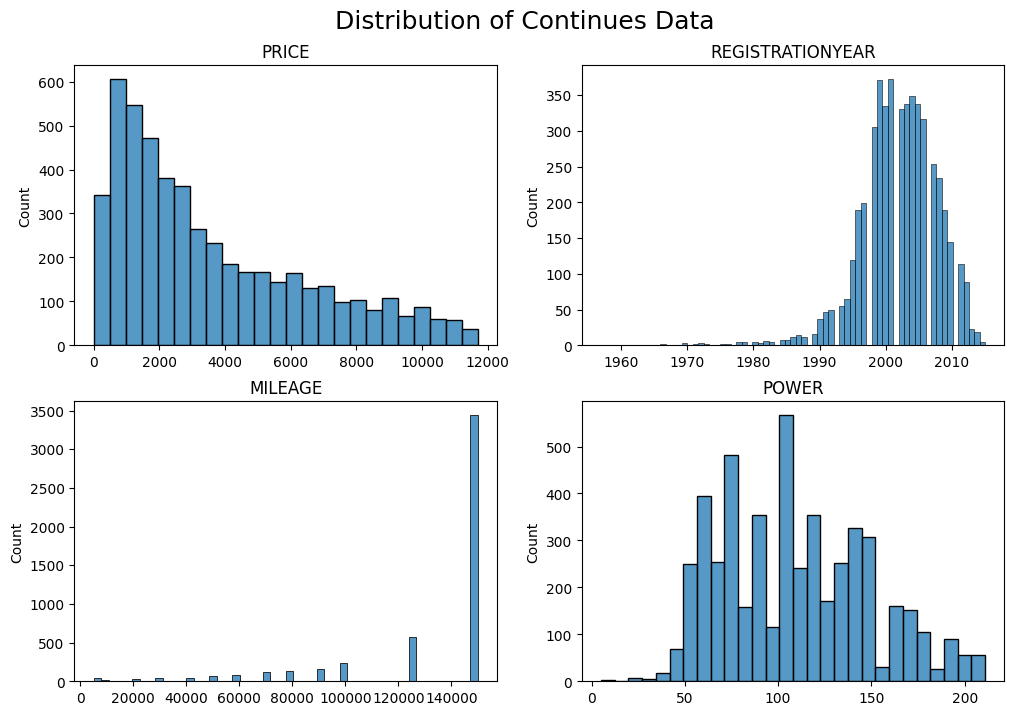

In [17]:
# display the distribution of continues columns
continues = ['Price', 'RegistrationYear', 'Mileage', 'Power']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)
plt.suptitle('Distribution of Continues Data', fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 2
# calculate number of rows
nrows = len(continues) // ncols + (len(continues) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, cont in enumerate(continues):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(data=df, x=df[cont].sample(5000), ax=ax)

    # chart formatting
    ax.set_title(cont.upper())
    ax.set_xlabel('')

plt.show()

- Harga mobil terendah adalah 0 dan yang tertinggi hampir mendekati 12000
- Mobil yang tergistrasi rata pada tahun 2000-2010
- Rata-rata Mileage lebih dari 140000 miles
- Rata-rata mobil memiliki daya 50-150 Hp

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

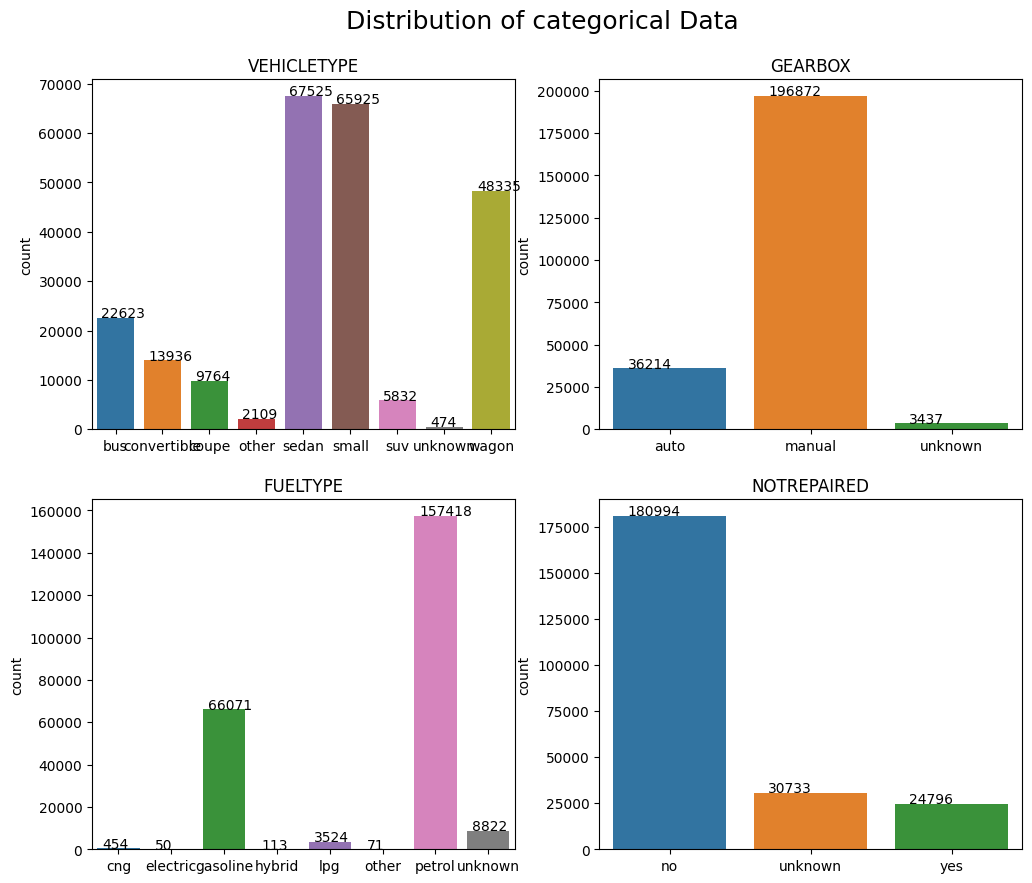

In [18]:
# display the distribution of categorical columns
categorical = ['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired']

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.2)
plt.suptitle('Distribution of categorical Data', fontsize=18, y=0.95)

# set number of columns (use 3 to demonstrate the change)
ncols = 2
# calculate number of rows
nrows = len(categorical) // ncols + (len(categorical) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, cat in enumerate(categorical):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    splot = sns.countplot(data=df, x=df[cat].sort_values(), ax=ax)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
    # chart formatting
    ax.set_title(cat.upper())
    ax.set_xlabel('')

plt.show()

- Mobil paling populer adalah tipe sedan dan small
- transmisi manual adalah yang paling banyak digunakan
- Bahan bakar paling sering digunakan adalah petrol dan gasoline
- Sebagian besar mobil belum pernah diperbaiki sebelumnya

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

OHE

Model ML hanya dapat memproses data numerik. KITA dapat merepresentasikan data kategorikal secara numerik dengan mengkodekannya

In [19]:
# Specifying columns to encode
columns_to_encode = ['VehicleType', 'Gearbox', 'Power', 'Model', 'FuelType', 'Brand', 'NotRepaired']
other_columns = ['RegistrationYear', 'Mileage', 'RegistrationMonth', 'Price']

# Transforming non-ordinal categorical columns
# drop_first=True to prevent redundancy
df_encoded = df[columns_to_encode]
df_encoded = pd.get_dummies(df_encoded, drop_first=True)
print('df_encoded size:', df_encoded.shape)

# Appending non-encoded columns to the df
df_encoded[other_columns] = df[other_columns]
print('Complete df_encoded size:', df_encoded.shape)

df_encoded size: (236523, 304)
Complete df_encoded size: (236523, 308)


Pemisahan data

Kita akan membagi data dengan rasio 70:30

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [20]:
df_train, df_test = train_test_split(df_encoded, train_size=0.7, random_state=random_state)
print('df_train size:', df_train.shape)
print('df_test size:', df_test.shape)

df_train size: (165566, 308)
df_test size: (70957, 308)


Penentuan target dan features

`Price` akan menjadi target pada model kali ini

In [21]:
train_target = df_train['Price']
train_features = df_train.drop('Price', axis=1)

test_target = df_test['Price']
test_features = df_test.drop('Price', axis=1)

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## Pelatihan Model

### Membuat dictionary untuk menampilkan performa model

Karena Rusty Bargain tertarik pada:
- kualitas prediksi
- kecepatan prediksi
- waktu yang diperlukan untuk melatih model
Kita akan membuat dictionary untuk menampilkan performa tiap model

In [22]:
performance_dict = {}
performance_columns = ['Training time', 'Test time', 'Test score', 'Training score']

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Linear Regression

In [23]:
# Creating an instance of the linear regressor model
lr = LinearRegression()

# Fitting
print('Training')

## Recording start time
start = time.process_time()
lr.fit(train_features, train_target)

Training


LinearRegression()

In [24]:
## Recording end time and storing it
end = time.process_time()
lr_train_time = end - start

print('Training CPU execution time:', lr_train_time)

Training CPU execution time: 15.115438311


In [25]:
pred = lr.predict(train_features)
lr_train_score = (mse(train_target, pred) ** 0.5)
print('Training score:', lr_train_score)
print()


Training score: 1748.0694367035005



In [26]:

# Testing
print('Testing')

## Getting test time
start = time.process_time()
pred = lr.predict(test_features)

## Recording end time and storing it
end = time.process_time()
lr_test_time = end - start
print('Test prediction CPU execution time:', lr_test_time)

## Getting test score
lr_test_score = (mse(test_target, pred) ** 0.5)
print('Test score:', lr_test_score)

# Storing information in the performance dictionary
performance_dict['lr'] = [lr_train_time, lr_test_time, lr_train_score, lr_test_score]

Testing
Test prediction CPU execution time: 0.14529591299999822
Test score: 1764.1068902982795


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Decision Tree Regressor

In [27]:
# Creating variables to store best scores and time
dtr_best_train_score = 10000
dtr_best_test_score = 10000
dtr_best_train_time = 10000
dtr_best_test_time = 10000
dtr_best_model = None

# Creating instances of the decision tree model with varying hyperparameters
for depth in range(1, 15):
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=random_state)

    # Fitting   
    ## Recording start time
    start = time.process_time()

    dtr.fit(train_features, train_target)

    ## Recording end time and storing it
    end = time.process_time()
    dtr_train_time = end - start
    
    pred = dtr.predict(train_features)
    dtr_train_score = (mse(train_target, pred) ** 0.5)
    
    # Testing   
    ## Recording start time
    start = time.process_time()

    pred = dtr.predict(test_features)

    ## Recording end time and storing it
    end = time.process_time()
    dtr_test_time = end - start
    
    dtr_test_score = (mse(test_target, pred) ** 0.5)
    
    # Storing best max_depth and scores
    if dtr_test_score < dtr_best_test_score:
        dtr_best_train_time = dtr_train_time
        dtr_best_test_time = dtr_test_time
        dtr_best_train_score = dtr_train_score
        dtr_best_test_score = dtr_test_score
        dtr_best_model = dtr

# Storing information in the performance dictionary
performance_dict['dtr'] = [dtr_best_train_time, dtr_best_test_time, dtr_best_train_score, dtr_best_test_score]
    
# Printing best depth and scores
print('Best training time:', dtr_best_train_time)
print('Best test time:', dtr_best_test_time)
print('Best training score:', dtr_best_train_score)
print('Best test score:', dtr_best_test_score)
print('Best model & hyperparameters:', dtr_best_model)

Best training time: 4.037143235000002
Best test time: 0.11601643899999203
Best training score: 1160.2945579816296
Best test score: 1360.2924331953036
Best model & hyperparameters: DecisionTreeRegressor(max_depth=14, random_state=12345)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Random Forest Regressor

In [28]:
# Creating variables to store best scores
rfr_best_train_score = 10000
rfr_best_test_score = 10000
rfr_best_train_time = 10000
rfr_best_test_time = 10000
rfr_best_model = None

# Increasing the number of estimators from 1 to 80 by 20 in each loop
for estimators in range(1, 81, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        rfr = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=random_state)

        # Fitting   
        ## Recording start time
        start = time.process_time()

        rfr.fit(train_features, train_target)

        ## Recording end time and storing it
        end = time.process_time()
        rfr_train_time = end - start

        pred = rfr.predict(train_features)
        rfr_train_score = (mse(train_target, pred) ** 0.5)

        # Testing   
        ## Recording start time
        start = time.process_time()

        pred = rfr.predict(test_features)

        ## Recording end time and storing it
        end = time.process_time()
        rfr_test_time = end - start

        rfr_test_score = (mse(test_target, pred) ** 0.5)

        # Storing best max_depth and scores
        if rfr_test_score < rfr_best_test_score:
            rfr_best_train_time = rfr_train_time
            rfr_best_test_time = rfr_test_time
            rfr_best_train_score = rfr_train_score
            rfr_best_test_score = rfr_test_score
            rfr_best_model = rfr
    
# Storing information in the performance dictionary
performance_dict['rfr'] = [rfr_best_train_time, rfr_best_test_time, rfr_best_train_score, rfr_best_test_score]
    
# Printing best hyperparameters and scores
print('Best training time:', rfr_best_train_time)
print('Best test time:', rfr_best_test_time)
print('Best training score:', rfr_best_train_score)
print('Best test score:', rfr_best_test_score)
print('Best model & hyperparameters:', rfr_best_model)

Best training time: 136.964923768
Best test time: 0.741039977000014
Best training score: 1259.5276611903114
Best test score: 1337.52991415326
Best model & hyperparameters: RandomForestRegressor(max_depth=11, n_estimators=61, random_state=12345)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

### Gradient-Boosting Algorithms

Gradient-boosting algorithms yang akan kita gunakan sebagai model terdiri dari : XGBoost, LightGBM, dan CatBoost

#### XGBoost Regressor

In [29]:
# Creating variables to store best scores
xgbr_best_train_score = 10000
xgbr_best_test_score = 10000
xgbr_best_train_time = 10000
xgbr_best_test_time = 10000
xgbr_best_model = None

# Increasing the number of estimators from 1 to 80 by 20 in each loop
for estimators in range(1, 81, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        xgbr = XGBRegressor(n_estimators=estimators, max_depth=depth, random_state=random_state)

        # Fitting   
        ## Recording start time
        start = time.process_time()

        xgbr.fit(train_features, train_target)

        ## Recording end time and storing it
        end = time.process_time()
        xgbr_train_time = end - start

        pred = xgbr.predict(train_features)
        xgbr_train_score = (mse(train_target, pred) ** 0.5)

        # Testing   
        ## Recording start time
        start = time.process_time()

        pred = xgbr.predict(test_features)

        ## Recording end time and storing it
        end = time.process_time()
        xgbr_test_time = end - start

        xgbr_test_score = (mse(test_target, pred) ** 0.5)

        # Storing best max_depth and scores
        if xgbr_test_score < xgbr_best_test_score:
            xgbr_best_train_time = xgbr_train_time
            xgbr_best_test_time = xgbr_test_time
            xgbr_best_train_score = xgbr_train_score
            xgbr_best_test_score = xgbr_test_score
            xgbr_best_model = xgbr
    
# Storing information in the performance dictionary
performance_dict['xgbr'] = [xgbr_best_train_time, xgbr_best_test_time, xgbr_best_train_score, xgbr_best_test_score]
    
# Printing best hyperparameters and scores
print('Best training time:', xgbr_best_train_time)
print('Best test time:', xgbr_best_test_time)
print('Best training score:', xgbr_best_train_score)
print('Best test score:', xgbr_best_test_score)
print('Best model & hyperparameters:', xgbr_best_model)

Best training time: 352.75145111899997
Best test time: 1.3605271139999786
Best training score: 946.7674745659662
Best test score: 1172.8143489871425
Best model & hyperparameters: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=11, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=61, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=12345,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

#### LightGBM Regressor

In [30]:
# Creating variables to store best scores
lgbmr_best_train_score = 10000
lgbmr_best_test_score = 10000
lgbmr_best_train_time = 10000
lgbmr_best_test_time = 10000
lgbmr_best_model = None

# Increasing the number of estimators from 1 to 80 by 20 in each loop
for estimators in range(1, 81, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        lgbmr = LGBMRegressor(n_estimators=estimators, max_depth=depth, random_state=random_state)

        # Fitting   
        ## Recording start time
        start = time.process_time()

        lgbmr.fit(train_features, train_target)

        ## Recording end time and storing it
        end = time.process_time()
        lgbmr_train_time = end - start

        pred = lgbmr.predict(train_features)
        lgbmr_train_score = (mse(train_target, pred) ** 0.5)

        # Testing   
        ## Recording start time
        start = time.process_time()

        pred = lgbmr.predict(test_features)

        ## Recording end time and storing it
        end = time.process_time()
        lgbmr_test_time = end - start

        lgbmr_test_score = (mse(test_target, pred) ** 0.5)

        # Storing best max_depth and scores
        if lgbmr_test_score < lgbmr_best_test_score:
            lgbmr_best_train_time = lgbmr_train_time
            lgbmr_best_test_time = lgbmr_test_time
            lgbmr_best_train_score = lgbmr_train_score
            lgbmr_best_test_score = lgbmr_test_score
            lgbmr_best_model = lgbmr
    
# Storing information in the performance dictionary
performance_dict['lgbmr'] = [lgbmr_best_train_time, lgbmr_best_test_time, lgbmr_best_train_score, lgbmr_best_test_score]
    
# Printing best hyperparameters and scores
print('Best training score:', lgbmr_best_train_score)
print('Best test score:', lgbmr_best_test_score)
print('Best training time:', lgbmr_best_train_time)
print('Best test time:', lgbmr_best_test_time)
print('Best model & hyperparameters:', lgbmr_best_model)

Best training score: 1245.327236503027
Best test score: 1270.376087508665
Best training time: 3.527839302000075
Best test time: 0.6370782479998525
Best model & hyperparameters: LGBMRegressor(max_depth=11, n_estimators=61, random_state=12345)


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

#### CatBoost Regressor

In [31]:
# Creating variables to store best scores
cbr_best_depth = 10000
cbr_best_train_score = 10000
cbr_best_test_score = 10000
cbr_best_train_time = 10000
cbr_best_test_time = 10000
cbr_best_model = None

# Increasing the number of estimators from 1 to 80 by 20 in each loop
for estimators in range(1, 81, 20):
    # Increasing the depth from 1 to 15 by 5 in each loop 
    for depth in range(1, 15, 5):
        # Creating instances of LGBMRegressor with varying hyperparameters
        cbr = CatBoostRegressor(n_estimators=estimators, max_depth=depth, random_state=random_state)

        # Fitting   
        ## Recording start time
        start = time.process_time()

        cbr.fit(train_features, train_target)

        ## Recording end time and storing it
        end = time.process_time()
        cbr_train_time = end - start

        pred = cbr.predict(train_features)
        cbr_train_score = (mse(train_target, pred) ** 0.5)

        # Testing   
        ## Recording start time
        start = time.process_time()

        pred = cbr.predict(test_features)

        ## Recording end time and storing it
        end = time.process_time()
        cbr_test_time = end - start

        cbr_test_score = (mse(test_target, pred) ** 0.5)

        # Storing best max_depth and scores
        if cbr_test_score < cbr_best_test_score:
            cbr_best_train_time = cbr_train_time
            cbr_best_test_time = cbr_test_time
            cbr_best_train_score = cbr_train_score
            cbr_best_test_score = cbr_test_score
            cbr_best_model = cbr
    
# Storing information in the performance dictionary
performance_dict['cbr'] = [cbr_best_train_time, cbr_best_test_time, cbr_best_train_score, cbr_best_test_score]
    
# Printing best hyperparameters and scores
print('Best training time:', cbr_best_train_time)
print('Best test time:', cbr_best_test_time)
print('Best training score:', cbr_best_train_score)
print('Best test score:', cbr_best_test_score)
print('Best model & hyperparameters:', cbr_best_model)

Learning rate set to 0.5
0:	learn: 2402.7824067	total: 72.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 2130.0763444	total: 41.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 2019.5216117	total: 129ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 2402.7824067	total: 19.8ms	remaining: 395ms
1:	learn: 2212.6499479	total: 40ms	remaining: 380ms
2:	learn: 2086.5548836	total: 59.3ms	remaining: 356ms
3:	learn: 1997.8078081	total: 77.5ms	remaining: 329ms
4:	learn: 1938.4744075	total: 96ms	remaining: 307ms
5:	learn: 1884.4547875	total: 115ms	remaining: 288ms
6:	learn: 1851.5088110	total: 134ms	remaining: 269ms
7:	learn: 1822.8224000	total: 154ms	remaining: 250ms
8:	learn: 1796.1990141	total: 172ms	remaining: 230ms
9:	learn: 1774.7140932	total: 191ms	remaining: 210ms
10:	learn: 1755.2224228	total: 210ms	remaining: 191ms
11:	learn: 1736.8452737	total: 231ms	remaining: 173ms
12:	learn: 1719.5735044	total: 250ms	remaining: 154ms
13:	learn: 1704.3655295	total: 270ms	remaining: 135m

2:	learn: 1470.6513334	total: 367ms	remaining: 4.65s
3:	learn: 1388.7633312	total: 498ms	remaining: 4.6s
4:	learn: 1349.4270243	total: 624ms	remaining: 4.5s
5:	learn: 1322.1611828	total: 746ms	remaining: 4.35s
6:	learn: 1306.1103228	total: 870ms	remaining: 4.22s
7:	learn: 1289.5300711	total: 998ms	remaining: 4.12s
8:	learn: 1277.7147575	total: 1.12s	remaining: 4s
9:	learn: 1268.8941505	total: 1.25s	remaining: 3.87s
10:	learn: 1262.3068094	total: 1.37s	remaining: 3.74s
11:	learn: 1256.8449244	total: 1.5s	remaining: 3.63s
12:	learn: 1253.2839868	total: 1.63s	remaining: 3.51s
13:	learn: 1248.0584536	total: 1.75s	remaining: 3.37s
14:	learn: 1240.3113684	total: 1.87s	remaining: 3.24s
15:	learn: 1233.2128582	total: 2s	remaining: 3.12s
16:	learn: 1226.3170212	total: 2.12s	remaining: 2.99s
17:	learn: 1221.9230044	total: 2.24s	remaining: 2.87s
18:	learn: 1219.5143482	total: 2.36s	remaining: 2.74s
19:	learn: 1215.8183362	total: 2.49s	remaining: 2.61s
20:	learn: 1211.6938465	total: 2.62s	remainin

58:	learn: 1220.0365903	total: 1.74s	remaining: 59.1ms
59:	learn: 1218.1447607	total: 1.77s	remaining: 29.5ms
60:	learn: 1216.5357001	total: 1.8s	remaining: 0us
Learning rate set to 0.5
0:	learn: 2019.5216117	total: 129ms	remaining: 7.73s
1:	learn: 1647.6488375	total: 253ms	remaining: 7.46s
2:	learn: 1470.6513334	total: 375ms	remaining: 7.25s
3:	learn: 1388.7633312	total: 498ms	remaining: 7.09s
4:	learn: 1349.4270243	total: 625ms	remaining: 6.99s
5:	learn: 1322.1611828	total: 752ms	remaining: 6.89s
6:	learn: 1306.1103228	total: 877ms	remaining: 6.76s
7:	learn: 1289.5300711	total: 1s	remaining: 6.65s
8:	learn: 1277.7147575	total: 1.13s	remaining: 6.53s
9:	learn: 1268.8941505	total: 1.26s	remaining: 6.41s
10:	learn: 1262.3068094	total: 1.38s	remaining: 6.29s
11:	learn: 1256.8449244	total: 1.51s	remaining: 6.17s
12:	learn: 1253.2839868	total: 1.63s	remaining: 6.03s
13:	learn: 1248.0584536	total: 1.76s	remaining: 5.91s
14:	learn: 1240.3113684	total: 1.89s	remaining: 5.78s
15:	learn: 1233.2

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

In [32]:
cbr_best_model.get_params()

{'loss_function': 'RMSE',
 'max_depth': 11,
 'n_estimators': 61,
 'random_state': 12345}

## Analisis Model

In [33]:
performance_df = pd.DataFrame.from_dict(data=performance_dict, orient='index', columns=performance_columns)
performance_df

,Training time,Test time,Test score,Training score
lr,15.115438,0.145296,1748.069437,1764.106890
dtr,4.037143,0.116016,1160.294558,1360.292433
rfr,136.964924,0.741040,1259.527661,1337.529914
xgbr,352.751451,1.360527,946.767475,1172.814349
lgbmr,3.527839,0.637078,1245.327237,1270.376088
cbr,8.941261,0.063075,1120.211076,1200.598413


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

## Kesimpulan

- Terdapat data yang hilang pada beberapa kolom, pada kolom vehicletype data yang hilang diisi berdasarkan model karena termasuk categorical data, dan yang lain kita isi dengan `unknown`
- Pada kolom 'registrationyear' tahun yang kurang dari 1913 dan lebih dari 2016 akan di drop karena kita anggap sebagai outlier
- Pada kolom power & price untuk menghilangkan outlier kita menggunakan pendekatan kuantil atas - kuantil bawah
- Total data yang di drop mencapai 117845 atau mencapai 33% dari dataset original
- Harga mobil terendah adalah 0 dan yang tertinggi hampir mendekati 12000, Mobil yang tergistrasi rata pada tahun 2000-2010, Rata-rata Mileage lebih dari 140000 miles, Rata-rata mobil memiliki daya 50-150 Hp
- Mobil paling populer adalah tipe sedan dan small, transmisi manual adalah yang paling banyak digunakan, Bahan bakar paling sering digunakan adalah petrol dan gasoline, Sebagian besar mobil belum pernah diperbaiki sebelumnya

- Untuk pelatihan model kita menggunakan linear regression, decision tree regressor, random forest regressor, dan untuk gradient boosting algoritms, kita menggunakan xgboost regressor, lightgbm regressor, dan catboost regressor
- Semua model dalam meprediksi target memiliki hasil yang lebih baik dari linear regression yang ditunjukkan dengan nilai RMSE lebih rendah
- Semua model ensemble mencapai puncak performa pada hyperparameter yg sama yakni `n_estimators` = 61, `max_depth` = 11
- XGBoost Regressor memiliki nilai yang terbaik untuk memprediksi target values (~1172), diikuti oleh Catboost regressor (~1200), dan LighGBM regressor (~1270)
- Catboost regressor memiliki performa tercepat untuk memprediksi target values (~0.06), diikuti oleh LighGBM regressor (~0.6), dan XGBoost regressor (~1.3) untuk model-model gradient boosting
- Dan untuk kecepatan pelatihan model, yang tercepat adalah LightGBM (~3.4), kemudian Catboost (~8.9), dan XGBoost (~338)

- Berdasarkan permintaan Rusty Bargain yang tertarik berdasarkan kriteria kualitas model, kecepatan prediksi , dan waktu yang diperlukan untuk melatih model untuk menentukan nilai pasar mobil, kita memutuskan untuk menggunakan model CatBoost Regressor dengan hyperparameter :
- 'loss_function': 'RMSE'
- 'max_depth': 11
- 'n_estimators': 61
- 'random_state': 12345

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!
</div>

# Daftar Periksa

Ketik 'x' untuk menandakannya sebagai selesai. Lalu, tekan tombol Shift+Enter

- [x]  Jupyter Notebook bisa dibuka
- [ ]  Tidak ada kesalahan pada kode
- [ ]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi
- [ ]  Data telah diunduh dan disiapkan- [ ]  Model sudah dilatih
- [ ]  Analisis terhadap kecepatan dan kualitas model telah dilakukan